### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [4]:
### Data Collection
import pandas_datareader as pdr
key = "e46970bde5460c8e6caece2452083771f7320e41"

In [5]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [6]:
df.to_csv('AAPL.csv')

In [7]:
import pandas as pd

In [8]:
df=pd.read_csv('AAPL.csv')

In [9]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-12-29 00:00:00+00:00,108.74,109.430,106.86,106.96,30931243,25.182942,25.342738,24.747556,24.770715,123724972,0.0,1.0
1,AAPL,2015-12-30 00:00:00+00:00,107.32,108.700,107.18,108.58,25213777,24.854087,25.173679,24.821664,25.145888,100855108,0.0,1.0
2,AAPL,2015-12-31 00:00:00+00:00,105.26,107.030,104.82,107.01,40912316,24.377014,24.786926,24.275115,24.782294,163649264,0.0,1.0
3,AAPL,2016-01-04 00:00:00+00:00,105.35,105.368,102.00,102.61,67649387,24.397857,24.402026,23.622035,23.763304,270597548,0.0,1.0
4,AAPL,2016-01-05 00:00:00+00:00,102.71,105.850,102.41,105.75,55790992,23.786463,24.513651,23.716987,24.490493,223163968,0.0,1.0


In [10]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-12-18 00:00:00+00:00,126.655,129.100,126.120,128.96,192541496,126.655,129.100,126.120,128.96,192541496,0.0,1.0
1254,AAPL,2020-12-21 00:00:00+00:00,128.230,128.310,123.449,125.02,121251553,128.230,128.310,123.449,125.02,121251553,0.0,1.0
1255,AAPL,2020-12-22 00:00:00+00:00,131.880,134.405,129.650,131.61,169351825,131.880,134.405,129.650,131.61,169351825,0.0,1.0
1256,AAPL,2020-12-23 00:00:00+00:00,130.960,132.430,130.780,132.16,88223692,130.960,132.430,130.780,132.16,88223692,0.0,1.0
1257,AAPL,2020-12-24 00:00:00+00:00,131.970,133.460,131.100,131.32,54930064,131.970,133.460,131.100,131.32,54930064,0.0,1.0


In [11]:
df1=df.reset_index()['close']

In [12]:
df1

0       108.740
1       107.320
2       105.260
3       105.350
4       102.710
         ...   
1253    126.655
1254    128.230
1255    131.880
1256    130.960
1257    131.970
Name: close, Length: 1258, dtype: float64

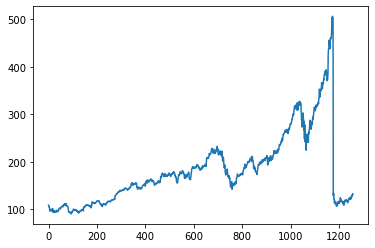

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [14]:
import numpy as np

In [15]:
df1

0       108.740
1       107.320
2       105.260
3       105.350
4       102.710
         ...   
1253    126.655
1254    128.230
1255    131.880
1256    130.960
1257    131.970
Name: close, Length: 1258, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df1)

[[0.04425737]
 [0.04084185]
 [0.03588695]
 ...
 [0.09991581]
 [0.09770295]
 [0.10013229]]


In [18]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(817, 441)

In [20]:
train_data

array([[0.04425737],
       [0.04084185],
       [0.03588695],
       [0.03610343],
       [0.02975346],
       [0.02491882],
       [0.01469633],
       [0.01592303],
       [0.01969934],
       [0.02313891],
       [0.01695731],
       [0.02208058],
       [0.01633193],
       [0.01520144],
       [0.01551413],
       [0.01433554],
       [0.02665063],
       [0.02188815],
       [0.02321106],
       [0.0074083 ],
       [0.00901984],
       [0.01683704],
       [0.01464823],
       [0.00995791],
       [0.0144558 ],
       [0.01505713],
       [0.00885147],
       [0.01123271],
       [0.01118461],
       [0.0094528 ],
       [0.00808178],
       [0.00877931],
       [0.01515334],
       [0.01871317],
       [0.01423933],
       [0.01371016],
       [0.01573061],
       [0.01046302],
       [0.01385448],
       [0.01544197],
       [0.01580277],
       [0.0152736 ],
       [0.02450992],
       [0.02503909],
       [0.02684305],
       [0.03047505],
       [0.02773301],
       [0.025

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [33]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

generator = TimeseriesGenerator(train_data, train_data,
                               length = time_step, sampling_rate = 1, batch_size = 1)

validation_generator = TimeseriesGenerator(test_data, test_data, 
                                           length = time_step, batch_size = 1)
print(len(generator))
print(len(validation_generator))

In [ ]:
print(X_train.shape), print(y_train.shape)

In [44]:
Xtrain, ytrain = generator[0]

In [ ]:
print(generator[0][0].shape)

In [ ]:

for i in range(len(generator)):
	X_train, y_train = generator[i]
	print('x:\n %s\n y:\n %s' % (X_train, y_train))

In [34]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=100,
                    validation_data=validation_generator)

Epoch 1/100
717/717 [==============================] - 65s 91ms/step - loss: 2.9450e-04 - val_loss: 0.0053
Epoch 2/100
717/717 [==============================] - 65s 91ms/step - loss: 2.2017e-04 - val_loss: 0.0042
Epoch 3/100
717/717 [==============================] - 66s 92ms/step - loss: 1.4648e-04 - val_loss: 0.0055
Epoch 4/100
717/717 [==============================] - 64s 90ms/step - loss: 1.2784e-04 - val_loss: 0.0046
Epoch 5/100
241/717 [=========>....................] - ETA: 40s - loss: 1.1993e-04 ETA: 41s - lo

In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 307ms/step - loss: 0.0086 - val_loss: 0.0582
Epoch 2/100
12/12 [==============================] - 2s 169ms/step - loss: 0.0025 - val_loss: 0.0234
Epoch 3/100
12/12 [==============================] - 2s 165ms/step - loss: 8.3105e-04 - val_loss: 0.0218
Epoch 4/100
12/12 [==============================] - 2s 184ms/step - loss: 5.3075e-04 - val_loss: 0.0216
Epoch 5/100
12/12 [==============================] - 2s 179ms/step - loss: 4.3556e-04 - val_loss: 0.0203
Epoch 6/100
12/12 [==============================] - 2s 171ms/step - loss: 3.7428e-04 - val_loss: 0.0197
Epoch 7/100
12/12 [==============================] - 2s 197ms/step - loss: 3.4356e-04 - val_loss: 0.0192-
Epoch 8/100
12/12 [==============================] - 2s 189ms/step - loss: 3.2288e-04 - val_loss: 0.0187
Epoch 9/100
12/12 [==============================] - 2s 170ms/step - loss: 3.3315e-04 - val_loss: 0.0183
Epoch 10/100
12/12 [==============================] - 2s 177ms

In [37]:
import tensorflow as tf

In [39]:
tf.__version__

'2.1.0'

In [432]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [433]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [434]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

140.9909210035748

In [435]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

235.7193088627771

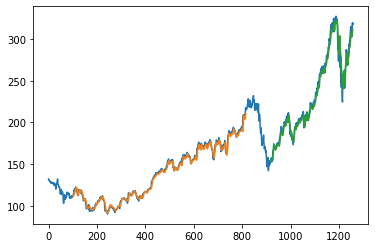

In [436]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [437]:
len(test_data)

441

In [438]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [439]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [440]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [441]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.94413203]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

In [442]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [443]:
import matplotlib.pyplot as plt

In [391]:
len(df1)

1258

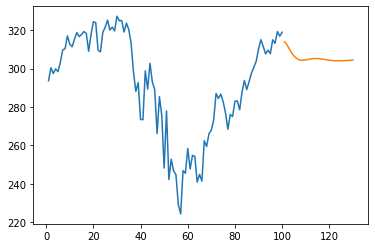

In [444]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

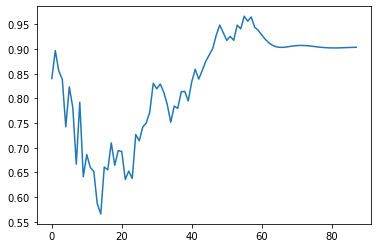

In [446]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [395]:
df3=scaler.inverse_transform(df3).tolist()

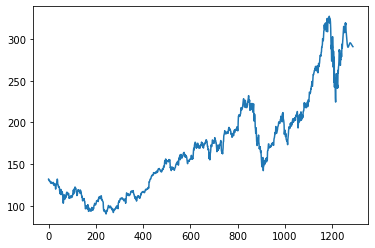

In [396]:
plt.plot(df3)